In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
data = pd.read_csv("city_temperature.csv")

/Users/feekah/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
data.head(5)
data.describe()
data.head(5)

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [24]:
#Create a list of Countries having the most sever global warming effects
#These countries were gotten from the article with link below
#https://thehill.com/changing-america/sustainability/climate-change/526684-these-are-the-10-countries-most-at-risk-from/

GWCountries = ['Japan', 'Philippines', 'Germany', 'Madagascar', 'India', 'Sri Lanka', 'Kenya', 'Rwanda', 'Canada', 'Fiji']

#Derive the countries of focus, and the year of focus
GWCountries_Data = data.loc[(data['Country'].isin(GWCountries)) & (data['Year'].isin([1995, 2010]))]
GWCountries_Data.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
105765,Africa,Kenya,NaN,Nairobi,1,1,1995,-99.0
105766,Africa,Kenya,NaN,Nairobi,1,2,1995,73.7
105767,Africa,Kenya,NaN,Nairobi,1,3,1995,71.4
105768,Africa,Kenya,NaN,Nairobi,1,4,1995,68.4
105769,Africa,Kenya,NaN,Nairobi,1,5,1995,65.3


In [26]:
#Deriving the average temperature for each month for each year for each city for each country
df1 = GWCountries_Data.groupby(['Country','City', 'Year', 'Month'],as_index=False).AvgTemperature.mean()
print(df1)

       Country     City  Year  Month  AvgTemperature
0       Canada  Calgary  1995      1       18.522581
1       Canada  Calgary  1995      2       22.932143
2       Canada  Calgary  1995      3       27.000000
3       Canada  Calgary  1995      4       37.463333
4       Canada  Calgary  1995      5       48.970968
..         ...      ...   ...    ...             ...
567  Sri Lanka  Colombo  2010      8       81.493548
568  Sri Lanka  Colombo  2010      9       81.356667
569  Sri Lanka  Colombo  2010     10       81.487097
570  Sri Lanka  Colombo  2010     11       79.830000
571  Sri Lanka  Colombo  2010     12       78.293548

[572 rows x 5 columns]


In [28]:
#Deriving the maximum temperature for each year for each city for each country
df2 = df1.groupby(['Country','City', 'Year'],as_index=False).AvgTemperature.max()
print(df2)

        Country              City  Year  AvgTemperature
0        Canada           Calgary  1995       59.729032
1        Canada           Calgary  2010       61.280645
2        Canada          Edmonton  1995       62.593548
3        Canada          Edmonton  2010       63.767742
4        Canada           Halifax  1995       66.232258
5        Canada           Halifax  2010       66.580645
6        Canada          Montreal  1995       72.122581
7        Canada          Montreal  2010       73.580645
8        Canada            Ottawa  1995       71.141935
9        Canada            Ottawa  2010       72.561290
10       Canada            Quebec  1995       69.441935
11       Canada            Quebec  2010       70.503226
12       Canada            Regina  1995       65.490323
13       Canada            Regina  2010       64.803226
14       Canada           Toronto  1995       71.616129
15       Canada           Toronto  2010       74.393548
16       Canada         Vancouver  1995       65

In [46]:
#Deriving the city with the maximum temperature for each country
df3 = df2.groupby(['Country', 'Year'],as_index=False).AvgTemperature.max()
print(df3)

        Country  Year  AvgTemperature
0        Canada  1995       72.122581
1        Canada  2010       74.393548
2       Germany  1995       68.977419
3       Germany  2010       68.803226
4         India  1995       95.830000
5         India  2010       94.348387
6         Japan  1995       85.332258
7         Japan  2010       88.145161
8         Kenya  1995       67.560000
9         Kenya  2010       16.103333
10   Madagascar  1995       71.000000
11   Madagascar  2010       71.358065
12  Philippines  1995       84.650000
13  Philippines  2010       88.145161
14    Sri Lanka  1995       82.373333
15    Sri Lanka  2010       83.303226


In [54]:
#Seperating the temperature for the two years into seperate columns by first creating new dataframes, then merging them bach

df_1995 = df3.loc[df3['Year'] == 1995]
df_1995.rename(columns = {'AvgTemperature':'Temperature in 1995'}, inplace = True)


df_2010 = df3.loc[df3['Year'] == 2010]
df_2010.rename(columns = {'AvgTemperature':'Temperature in 2010'}, inplace = True)


MergedData = pd.merge(df_1995,df_2010,on='Country')
print(MergedData)
CleanedData =MergedData.drop(['Year_x', 'Year_y'], axis=1)
print(CleanedData)



       Country  Year_x  Temperature in 1995  Year_y  Temperature in 2010
0       Canada    1995            72.122581    2010            74.393548
1      Germany    1995            68.977419    2010            68.803226
2        India    1995            95.830000    2010            94.348387
3        Japan    1995            85.332258    2010            88.145161
4        Kenya    1995            67.560000    2010            16.103333
5   Madagascar    1995            71.000000    2010            71.358065
6  Philippines    1995            84.650000    2010            88.145161
7    Sri Lanka    1995            82.373333    2010            83.303226
       Country  Temperature in 1995  Temperature in 2010
0       Canada            72.122581            74.393548
1      Germany            68.977419            68.803226
2        India            95.830000            94.348387
3        Japan            85.332258            88.145161
4        Kenya            67.560000            16.103333
5

/Users/feekah/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/Users/feekah/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


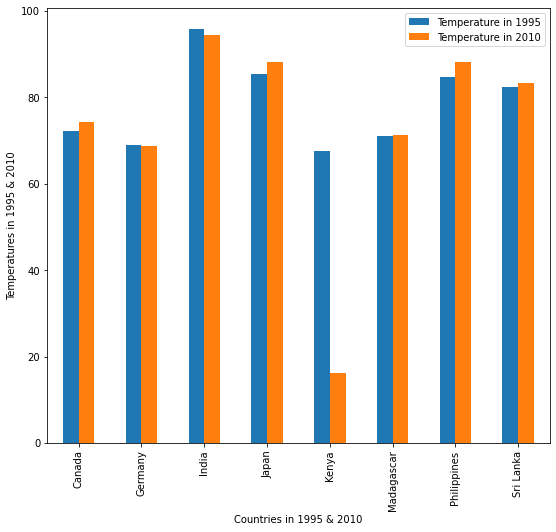

In [56]:
#Plotting the Countries for both temperatures
CleanedData.plot(x="Country", y=["Temperature in 1995", "Temperature in 2010"], kind="bar",figsize=(9,8))
plt.xlabel("Countries in 1995 & 2010")
plt.ylabel("Temperatures in 1995 & 2010")
plt.show()
